## Effect of batch size notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [6]:
series = 23
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [7]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['1', '2', '4', '8', '16'],
    'data_type': 'text',
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_variants': [   'huggingface/distilbert-base-uncased-finetuned-mnli',
                          'huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli',
                          'distilbert-base-uncased-finetuned-sst-2-english',
                          'Souvikcmsa/BERT_sentiment_analysis',
                          'Souvikcmsa/SentimentAnalysisDistillBERT',
                          'Souvikcmsa/Roberta_Sentiment_Analysis'],
    'node_name': 'nlp-sent',
    'pipeline_name': 'audio-sent',
    'repetition': 1,
    'replicas': [1],
    'series': 23,
    'series_meta': 'checking the effect of changing all variables,\\n cpu '
                   'type: Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test':

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,Souvikcmsa/BERT_sentiment_analysis,1,1,34.312248,195.056044,30.403348
1,Souvikcmsa/BERT_sentiment_analysis,1,2,8.077552,153.348131,3.314894
2,Souvikcmsa/BERT_sentiment_analysis,1,4,1.156890,31.944692,0.328648
3,Souvikcmsa/BERT_sentiment_analysis,1,8,0.704533,35.805185,0.110871
4,Souvikcmsa/BERT_sentiment_analysis,1,16,0.135382,31.563994,0.055757
5,Souvikcmsa/BERT_sentiment_analysis,2,1,9.594662,77.833409,4.466569
6,Souvikcmsa/BERT_sentiment_analysis,2,2,4.397443,27.404429,1.318997
7,Souvikcmsa/BERT_sentiment_analysis,2,4,2.332968,31.532729,0.815299
8,Souvikcmsa/BERT_sentiment_analysis,2,8,0.501874,22.918226,0.130516
9,Souvikcmsa/BERT_sentiment_analysis,2,16,0.143482,26.546719,0.055691


Text(0, 0.5, 'Latency (seconds)')

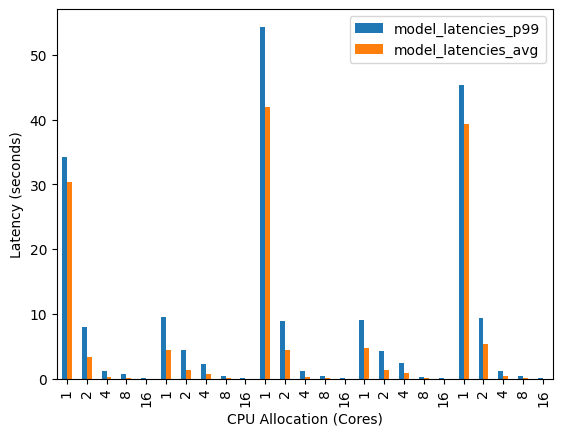

In [10]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'Souvikcmsa/BERT_sentiment_analysis']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (Cores)")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,Souvikcmsa/BERT_sentiment_analysis,1,1,34.312248,195.056044,30.403348
1,Souvikcmsa/BERT_sentiment_analysis,1,2,8.077552,153.348131,3.314894
2,Souvikcmsa/BERT_sentiment_analysis,1,4,1.156890,31.944692,0.328648
3,Souvikcmsa/BERT_sentiment_analysis,1,8,0.704533,35.805185,0.110871
4,Souvikcmsa/BERT_sentiment_analysis,1,16,0.135382,31.563994,0.055757
5,Souvikcmsa/BERT_sentiment_analysis,2,1,9.594662,77.833409,4.466569
6,Souvikcmsa/BERT_sentiment_analysis,2,2,4.397443,27.404429,1.318997
7,Souvikcmsa/BERT_sentiment_analysis,2,4,2.332968,31.532729,0.815299
8,Souvikcmsa/BERT_sentiment_analysis,2,8,0.501874,22.918226,0.130516
9,Souvikcmsa/BERT_sentiment_analysis,2,16,0.143482,26.546719,0.055691


Text(0, 0.5, 'Latency (seconds)')

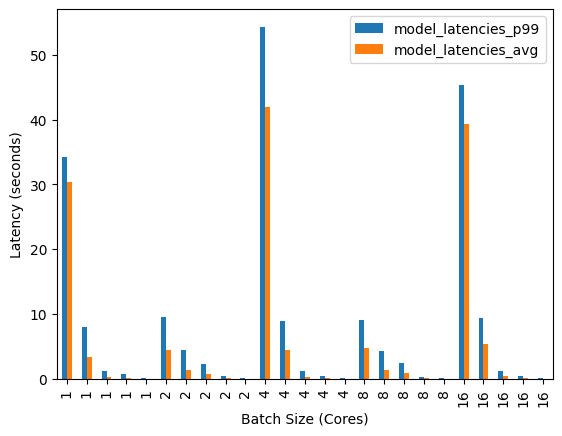

In [13]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'Souvikcmsa/BERT_sentiment_analysis']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Batch Size (Cores)")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,Souvikcmsa/BERT_sentiment_analysis,1,2,8.077552,153.348131,3.314894
1,Souvikcmsa/BERT_sentiment_analysis,2,2,4.397443,27.404429,1.318997
2,Souvikcmsa/BERT_sentiment_analysis,4,2,9.003939,104.381008,4.444289
3,Souvikcmsa/BERT_sentiment_analysis,8,2,4.306079,26.570826,1.384367
4,Souvikcmsa/BERT_sentiment_analysis,16,2,9.392772,145.455513,5.412054


Text(0, 0.5, 'Latency (seconds)')

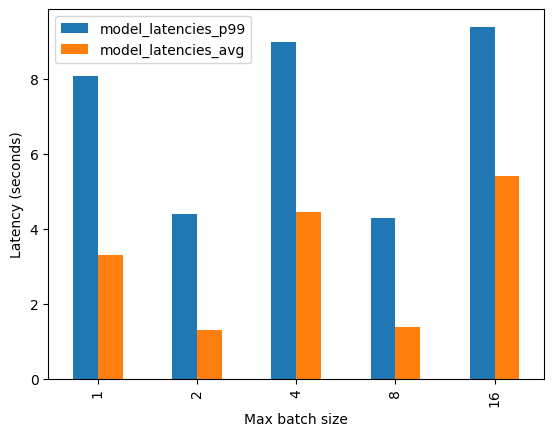

In [18]:
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == 'Souvikcmsa/BERT_sentiment_analysis') &
    (key_config_df['cpu_request'] == 2)]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns).sort_values(['cpu_request', 'max_batch_size'])
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,Souvikcmsa/BERT_sentiment_analysis,1,8,0.704533,35.805185,0.110871
1,Souvikcmsa/BERT_sentiment_analysis,2,8,0.501874,22.918226,0.130516
2,Souvikcmsa/BERT_sentiment_analysis,4,8,0.392671,24.957794,0.154349
3,Souvikcmsa/BERT_sentiment_analysis,8,8,0.367702,24.901229,0.132407
4,Souvikcmsa/BERT_sentiment_analysis,16,8,0.475726,28.040251,0.153954


Text(0, 0.5, 'Latency (seconds)')

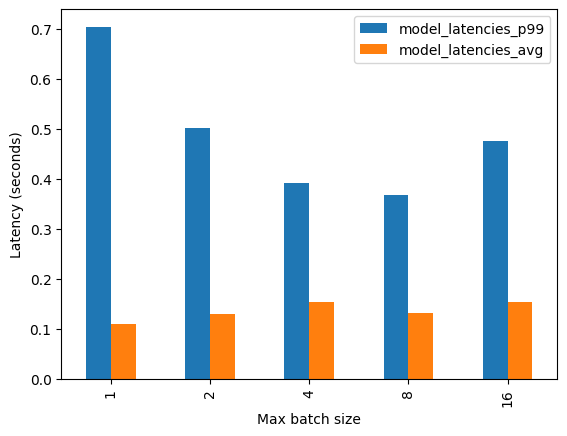

In [22]:
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == 'Souvikcmsa/BERT_sentiment_analysis') &
    (key_config_df['cpu_request'] == 8)]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns).sort_values(['cpu_request', 'max_batch_size'])
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,1,4.880700,91.027312,3.152761
1,resnet18,1,2,3.081147,71.084762,1.795392
2,resnet18,1,4,0.994883,30.833773,0.385965
3,resnet18,1,8,0.403473,22.530539,0.120931
4,resnet18,1,16,0.288452,17.617062,0.109956
5,resnet18,2,1,5.702314,72.625160,3.972998
6,resnet18,2,2,4.697503,70.558215,3.097239
7,resnet18,2,4,1.377262,26.123320,0.578785
8,resnet18,2,8,0.700785,21.324022,0.230836
9,resnet18,2,16,0.290691,19.440822,0.151584


,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,max_batch_size_num,cpu_request_num
0,resnet18,1,1,4.880700,91.027312,3.152761,0,0
1,resnet18,1,2,3.081147,71.084762,1.795392,0,1
2,resnet18,1,4,0.994883,30.833773,0.385965,0,2
3,resnet18,1,8,0.403473,22.530539,0.120931,0,3
4,resnet18,1,16,0.288452,17.617062,0.109956,0,4
5,resnet18,2,1,5.702314,72.625160,3.972998,1,0
6,resnet18,2,2,4.697503,70.558215,3.097239,1,1
7,resnet18,2,4,1.377262,26.123320,0.578785,1,2
8,resnet18,2,8,0.700785,21.324022,0.230836,1,3
9,resnet18,2,16,0.290691,19.440822,0.151584,1,4


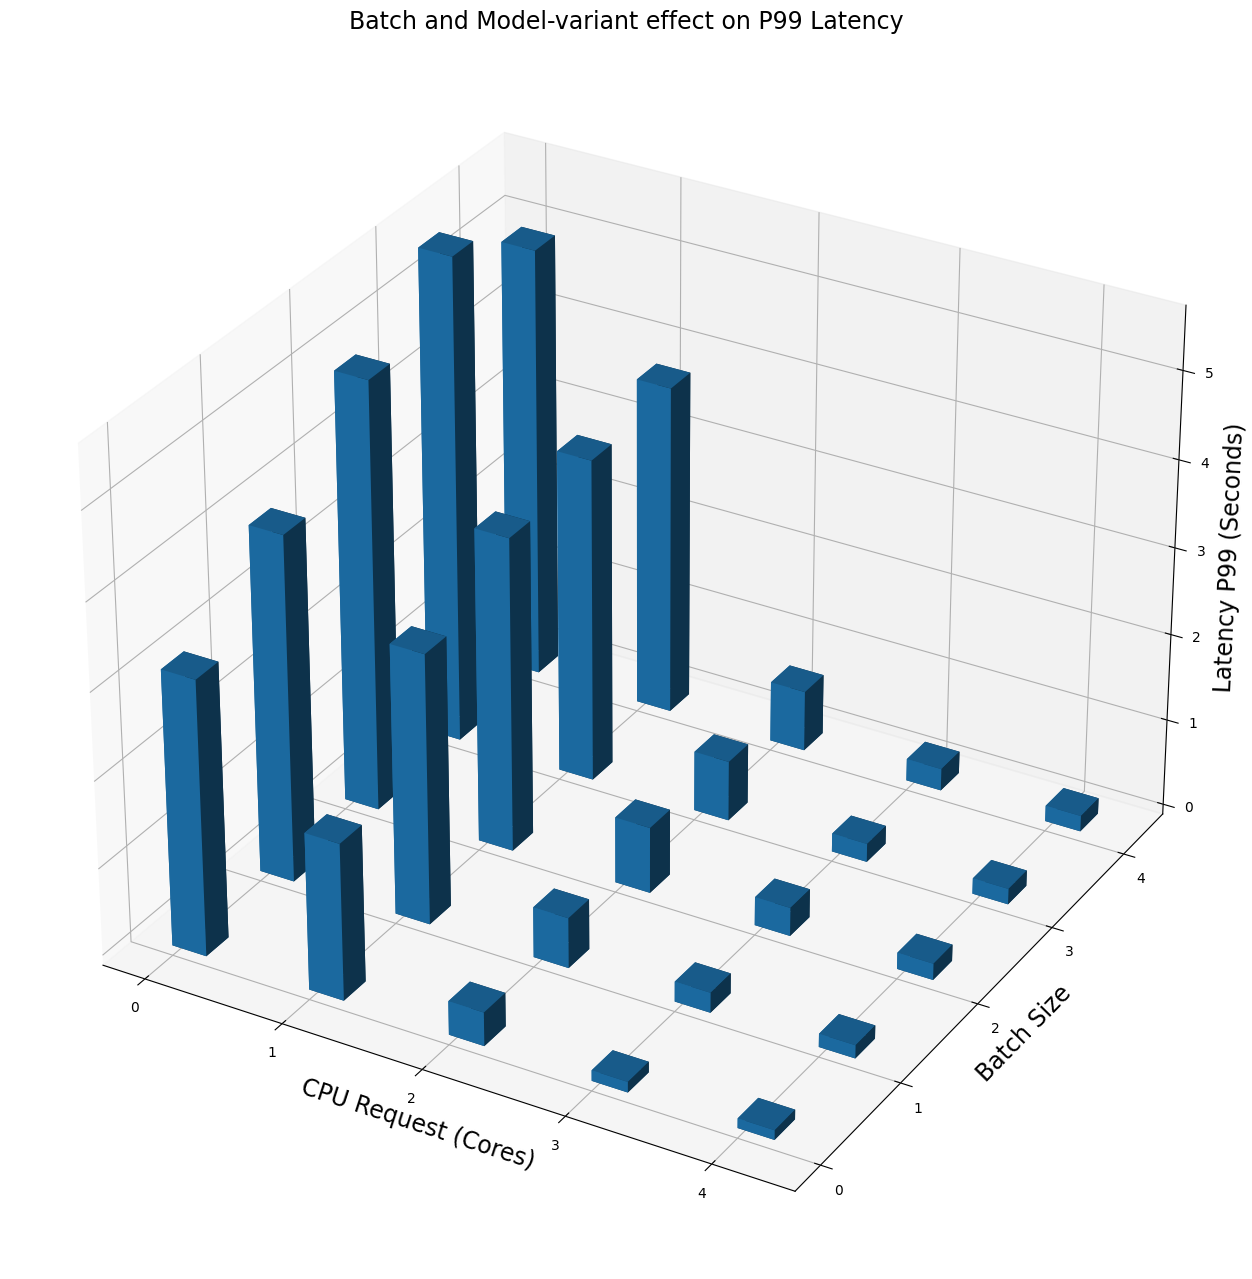

In [6]:
from ipaddress import collapse_addresses
import numpy as np
import matplotlib.pyplot as plt

# model_vairant = 'resnet152'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet18']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)

display(output)

output['max_batch_size_num'] = output['max_batch_size'].replace({
    1: 0,
    2: 1,
    4: 2,
    8: 3,
    16: 4,
})

output['cpu_request_num'] = output['cpu_request'].replace({
    1: 0,
    2: 1,
    4: 2,
    8: 3,
    16: 4,
})

display(output)

# setup the figure and axes
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(111, projection='3d')

dx = 0.25
dy = 0.25

# colors = ['skyblue', 'g', 'r', 'pink', 'coral']

y = output['max_batch_size_num']
x = output['cpu_request_num']
top = output['model_latencies_avg']
z = np.zeros_like(top)

ax1.bar3d(x, y, z, dx, dy, top, shade=True)
ax1.set_title('Batch and Model-variant effect on P99 Latency', size=17)
ax1.set_xlabel('CPU Request (Cores)', size=17)
ax1.set_ylabel('Batch Size', size=17)
ax1.set_zlabel('Latency P99 (Seconds)', size=17)
# ax1.set_yticklabels(['resnet18', 'resnet50', 'resnet152'])
# ax1.set_ylim(0, 1)
# experiment_ids
# ax1.view_init(120, 120)


plt.show()

In [8]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet18']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg', 'memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns).sort_values(['cpu_request', 'max_batch_size'])
display(output)
# ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
# ax.set_xlabel("Max batch size")
# ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,memory_usage_max
0,resnet18,1,1,4.880700,91.027312,3.152761,704307200.0
5,resnet18,2,1,5.702314,72.625160,3.972998,724119552.0
10,resnet18,4,1,11.200623,69.011718,4.944353,766382080.0
15,resnet18,8,1,11.201776,71.369997,5.603755,781799424.0
20,resnet18,16,1,7.798599,76.511936,4.974329,765947904.0
1,resnet18,1,2,3.081147,71.084762,1.795392,691126272.0
6,resnet18,2,2,4.697503,70.558215,3.097239,717717504.0
11,resnet18,4,2,6.676913,71.647827,3.611135,751448064.0
16,resnet18,8,2,7.197813,96.777559,3.726374,782852096.0
21,resnet18,16,2,6.197035,78.571627,3.809782,758177792.0
